In [44]:
import pandas as pd 
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set(color_codes=True)

import datetime

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


dataset = pd.read_csv("./Desktop/FYP/sampledata_fyp.csv")

In [45]:
type(dataset.values)
corpus = dataset.head(1)
print(corpus)

                                       advertiserurl  \
0  https://www.dice.com/jobs/detail/AUTOMATION-TE...   

                             company  \
0  Digital Intelligence Systems, LLC   

                            employmenttype_jobstatus  \
0  C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...   

                                      jobdescription               jobid  \
0  Looking for Selenium engineers...must have sol...  Dice Id : 10110693   

  joblocation_address                  jobtitle    postdate  \
0         Atlanta, GA  AUTOMATION TEST ENGINEER  1 hour ago   

                                             shift site_name     skills  \
0  Telecommuting not available|Travel not required       NaN  SEE BELOW   

                            uniq_id  
0  418ff92580b270ef4e7c14f0ddfc36b4  


In [46]:
JD = dataset["jobdescription"]
corpus = ""
for i in JD:
    corpus += str(i)
    #corpus.append(str(i))
    #print (type(i))
#corpus
#print(type(JD))

In [47]:
#Import Lib & Creating Objects
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

data = []

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [48]:
#Cleaning Dataset
for i in range (0, len(JD)):
    review = re.sub('[^a-zA-Z]', ' ', JD[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) 
               for word in review 
                  if not word in stopwords.words('english')]
    review = ' '.join(review)
    #print (type(review))
    data.append(review)   

In [57]:
# stopwordsFile = pd.read_csv("./Desktop/FYP/stopwords_jd.csv")
# #stopwordsFile = stopwordsFile["stopwords"]
# list_words = str(stopwordsFile.loc[1:])
# print(type(list_words))
# words = list_words.split()
# print(words[3])
# # print(len(stopwordsFile))
# data0 =[]

# for i in review:
#     string = ""
#     for word in words:
#         if word == i:
#             continue
#         else:
#             string += str(i)
#     data0.append(string)
    
# print(data0)

In [49]:
#Printing Clean Data

print(type(data))
#data[99]

<class 'list'>


In [50]:
#TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 1, max_df = 2)
matrix_input = tfidf.fit_transform(data)
matrix_input

<1000x9054 sparse matrix of type '<class 'numpy.float64'>'
	with 10621 stored elements in Compressed Sparse Row format>

In [51]:
#Resultant Matrix Conversion Into Array Format

X = matrix_input.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
#Mean Shift Clustering

from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

#bandwidth = estimate_bandwidth(X,quantile=1, n_samples=10)
ms = MeanShift(bandwidth=1, bin_seeding=False).fit(X)
ms

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [15]:
#Cluster ID's

print(len(ms.labels_))

1000


In [58]:
#Unique Cluster ID's

labels_unique_ms = np.unique(ms.labels_)
labels_unique_ms

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [60]:
from sklearn.decomposition import PCA
pca = PCA(2)
data0 = pca.fit_transform(X)
label = ms.fit_predict(X)
centers = np.array(ms.cluster_centers_)
print(data0)
# labels_unique_ms
# for i in labels_unique_ms:
#     plt.scatter(data0[matrix_input == i,0] , data0[matrix_input == i,1], matrix_input = i)
    
# plt.scatter(centers[:,0] , centers[:,1], marker="x", color='k')
# plt.legend()
# plt.show()

[[ 0.00404131 -0.00118192]
 [ 0.00357301 -0.00120184]
 [ 0.00010201  0.00052855]
 ...
 [ 0.00663354 -0.00333349]
 [ 0.00297502 -0.00057698]
 [ 0.00399508 -0.00207206]]


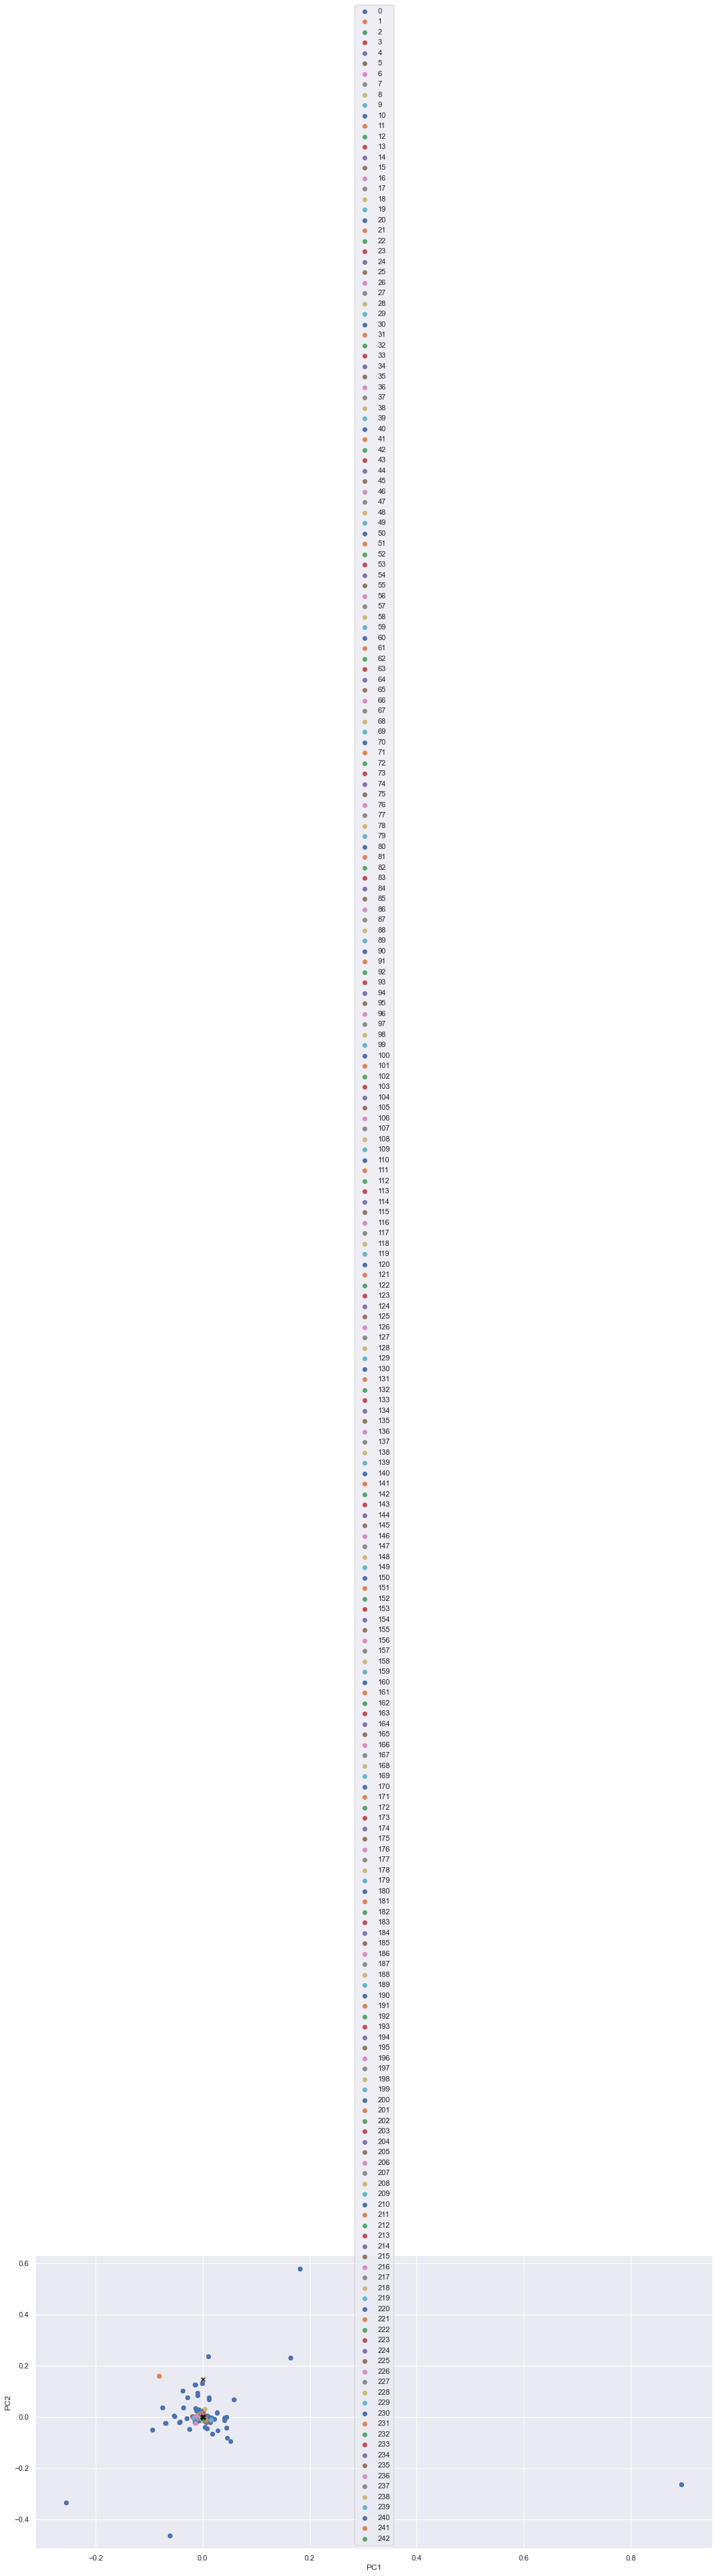

In [115]:
# labels_unique_ms
plt.figure(figsize=(18,8))
plt.xlabel("PC1")
plt.ylabel("PC2")

for i in labels_unique_ms:
    plt.scatter(data0[label == i,0] , data0[label == i,1], label = i)
    
plt.scatter(centers[:,0] , centers[:,1], marker="x", color='k')

plt.legend()
plt.show()

In [19]:
#Total No of Clusters

n_clusters = len(labels_unique_ms)
n_clusters

243

In [62]:
clusters_center = ms.cluster_centers_
clusters_center
dic= {}
labels = ms.labels_
counter = 0
for i in labels:
    if(i not in dic):
        dic[i] = [data[counter]]
    else:
        dic[i].append(data[counter])
        
    counter += 1

In [97]:
#Printing Dictionary Data
lenOfDic = len(dic)
lenOfDic

print((len(dic[0])))

#clus_zero_Dic = dic[0]

757


In [70]:
# #TF-IDF Vectorization For Zero Cluster

# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(min_df = 1, max_df = 2)
# matrix_input_clus = tfidf.fit_transform(clus_zero_Dic)
# matrix_input_clus

<757x7052 sparse matrix of type '<class 'numpy.float64'>'
	with 8406 stored elements in Compressed Sparse Row format>

In [71]:
# Y = matrix_input_clus.toarray()
# Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
# ms = MeanShift(bandwidth=1, bin_seeding=False).fit(Y)
# ms

MeanShift(bandwidth=1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [75]:
# len(ms.labels_)

757

In [77]:
# from sklearn.decomposition import PCA
# pca = PCA(2)
# data1 = pca.fit_transform(X)
# label = ms.fit_predict(X)
# centers = np.array(ms.cluster_centers_)
# print(data1)

[[-1.14563708e-03  4.11312802e-03]
 [-2.95752161e-03  1.21095915e-03]
 [ 1.78731104e-03  1.37881449e-03]
 ...
 [-8.78983503e-04 -1.32494060e-03]
 [-2.06726431e-06  2.33329715e-03]
 [ 4.64422678e-04  8.03775935e-04]]


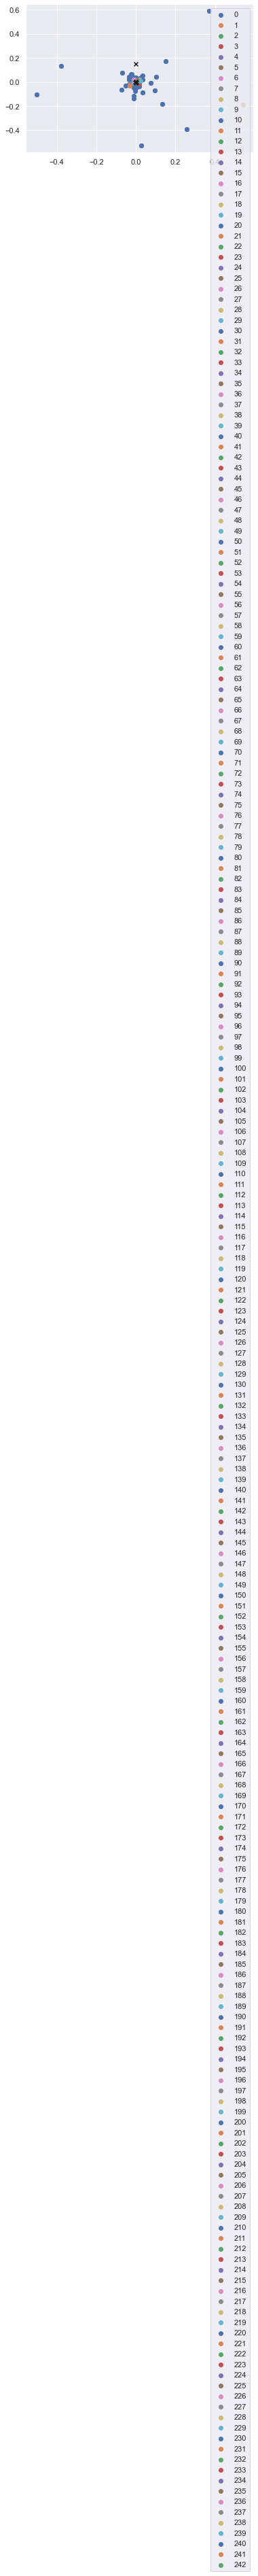

In [78]:
# # labels_unique_ms
# for i in labels_unique_ms:
#     plt.scatter(data1[label == i,0] , data1[label == i,1], label = i)
    
# plt.scatter(centers[:,0] , centers[:,1], marker="x", color='k')
# plt.legend()
# plt.show()

In [98]:
#print(dic) #id = integer and value = multiple list of string #Merge JDS In Specific Cluster
new_dic = {}
string = ""
count = 0
for clus_id in dic:
    jds = dic[clus_id]
    length = len(jds)
    for i in range(length):
        string += jds[i]
        string += "\n"
    new_dic[clus_id] = string
    string = ""

#print(new_dic[0])


In [99]:
len(dic)

243

In [106]:
#Yet Another Keyword Extractor - YAKE

import yake



In [107]:
#Keywords Extraction 

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20

all_keywords = []

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
dic_kw = {}
for i in range(len(new_dic)):
    words = []
    keywords = custom_kw_extractor.extract_keywords(new_dic[i])
    for kw in keywords:
           words.append(kw)
    dic_kw[i] = words
    #all_keywords.append(words)
print(dic_kw[0])

[('experience year experience', 9.471535224754034e-09), ('software development experience', 3.008876200585769e-08), ('client opportunity work', 3.018709421168755e-08), ('skill ability work', 3.0212809264857835e-08), ('year experience software', 3.1932407980020434e-08), ('technical skill client', 3.2584824551713144e-08), ('year experience working', 3.289121088085319e-08), ('year work experience', 3.60487388978909e-08), ('project management experience', 4.0181339679616667e-08), ('experience software development', 4.137204775805433e-08), ('communication skill ability', 4.5107480906728013e-08), ('minimum year experience', 4.565921749381732e-08), ('written communication skill', 4.672292491770689e-08), ('work experience year', 4.6863360567258166e-08), ('required skill experience', 4.87917630762271e-08), ('year experience knowledge', 4.942951181098325e-08), ('skill year experience', 5.370443554454563e-08), ('experience experience working', 6.027592659681663e-08), ('knowledge client opportunit

In [108]:
#YAKE All Keywords Printing
print (dic_kw[200])

[('programmerlocation marlborough maduration', 0.006847176384826289), ('marlborough maduration month', 0.006847176384826289), ('development life cycle', 0.006847176384826289), ('life cycle initiation', 0.006847176384826289), ('cycle initiation implementation', 0.006847176384826289), ('initiation implementation candidate', 0.006847176384826289), ('implementation candidate required', 0.006847176384826289), ('candidate required flush', 0.006847176384826289), ('required flush requirement', 0.006847176384826289), ('flush requirement meet', 0.006847176384826289), ('requirement meet business', 0.006847176384826289), ('meet business owner', 0.006847176384826289), ('construct test solution', 0.006847176384826289), ('focus include vms', 0.006847176384826289), ('include vms operating', 0.006847176384826289), ('vms operating system', 0.006847176384826289), ('dcl command procedure', 0.006847176384826289), ('protocol including telnet', 0.006847176384826289), ('including telnet tcp', 0.00684717638482

In [109]:
def get_keywords(integer,data_list):
    specific_data = data_list[integer]
    for words in specific_data:
        print(words)

In [110]:
get_keywords(0,dic_kw)

('experience year experience', 9.471535224754034e-09)
('software development experience', 3.008876200585769e-08)
('client opportunity work', 3.018709421168755e-08)
('skill ability work', 3.0212809264857835e-08)
('year experience software', 3.1932407980020434e-08)
('technical skill client', 3.2584824551713144e-08)
('year experience working', 3.289121088085319e-08)
('year work experience', 3.60487388978909e-08)
('project management experience', 4.0181339679616667e-08)
('experience software development', 4.137204775805433e-08)
('communication skill ability', 4.5107480906728013e-08)
('minimum year experience', 4.565921749381732e-08)
('written communication skill', 4.672292491770689e-08)
('work experience year', 4.6863360567258166e-08)
('required skill experience', 4.87917630762271e-08)
('year experience knowledge', 4.942951181098325e-08)
('skill year experience', 5.370443554454563e-08)
('experience experience working', 6.027592659681663e-08)
('knowledge client opportunity', 6.1863067427416

In [111]:
#Highlight Keywords in the Textual Data

from yake.highlight import TextHighlighter

th = TextHighlighter(max_ngram_size = 3)
th.highlight(data[0], all_keywords[0])

IndexError: list index out of range

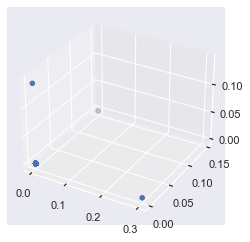

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
#ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()


In [ ]:
### DB SCAN

from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=1, min_samples=1).fit(X)
clustering

In [ ]:
clustering.labels_

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)

In [ ]:
km

In [ ]:
km.fit(X)

In [ ]:
print(X)

In [ ]:
km_Labels = km.labels_
print(km_Labels)

In [ ]:
unique_labels_km = np.unique(km.labels_)
print (unique_labels_km)

clus = len(km_Labels)


In [ ]:
dicKM= {}
labels = km.labels_
counter = 0
for i in labels:
    if(i not in dicKM):
        dicKM[i] = [data[counter]]
    else:
        dicKM[i].append(data[counter])
        
    counter += 1

In [ ]:
# print(dicKM[0]) 

In [ ]:
import matplotlib.pyplot as plt

# print(len(km_Labels))
# print(len(X))

plt.scatter(km_Labels,X[:,0])
plt.show()

In [ ]:
#print(new_dicKM)

In [ ]:
#print(dic) #id = integer and value = multiple list of string
new_dicKM = {}
string_KM = ""
count_KM = 0
for clus_id in dicKM:
    jds = dicKM[clus_id]
    length = len(jds)
    for i in range(length):
        string_KM += jds[i]
        string_KM += "\n"
        #print(string)
    new_dicKM[clus_id] = string_KM
    string_KM = ""

#print(new_dic[0])

In [ ]:
#print(new_dicKM[0])

In [ ]:
#Yet Another Keyword Extractor - YAKE

import yake

#Keywords Extraction 

language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20

all_keywords = []

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
dic_kw = {}
for i in range(len(new_dicKM)):
    words = []
    keywords = custom_kw_extractor.extract_keywords(new_dicKM[i])
    for kw in keywords:
           words.append(kw)
    dic_kw[i] = words
    #all_keywords.append(words)


In [ ]:
#YAKE All Keywords Printing
#print (dic_kw)

In [ ]:
def get_keywords(integer,data_list):
    specific_data = data_list[integer]
    for words in specific_data:
        print(words)

In [ ]:
get_keywords(1,dic_kw)

In [ ]:
#plot libs 

data1 = len(dicKM[0])
data2 = len(dicKM[1])

In [ ]:
from sklearn.cluster import KMeans
import numpy as np


plt.scatter(data1,data2 , alpha = 0.6, s = 10)



In [ ]:
for i in range(5):
    print(i)